In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import explore as ex

from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from wrangle import box_plot, hist_plot, wrangle_zillow
from prepare import scale_data, visualize_scaler

##### Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.


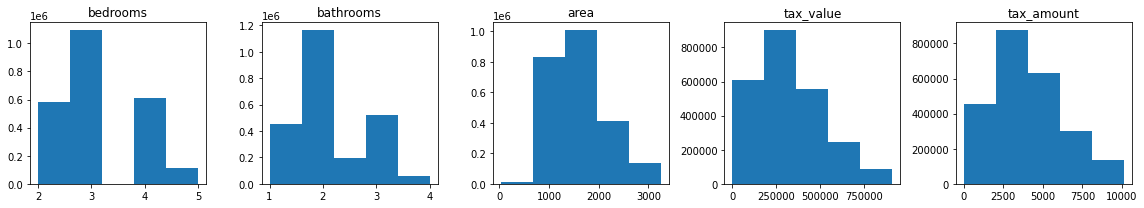

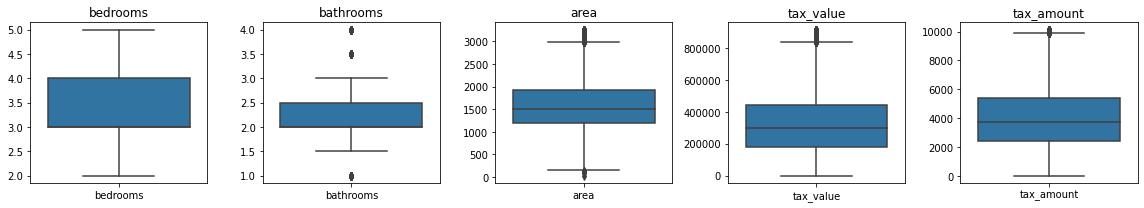

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
664341,3.0,2.0,1121.0,147619.0,1963.0,2252.14,6037.0
2345141,4.0,3.0,2054.0,543997.0,1990.0,6689.79,6037.0
1724075,3.0,1.0,1078.0,263708.0,1953.0,3466.35,6037.0
1717184,3.0,3.0,1376.0,456880.0,1989.0,5489.43,6037.0
1026668,2.0,2.0,1985.0,695787.0,1992.0,6990.28,6059.0


In [10]:
train_df, validate_df, test_df = wrangle_zillow()
train_df.head()

In [3]:
train_df.shape, validate_df.shape, test_df.shape

((1342770, 7), (575474, 7), (479562, 7))

In [4]:
# Checking the function assigned dtypes correctly still.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342770 entries, 664341 to 1271491
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1342770 non-null  float64
 1   bathrooms   1342770 non-null  float64
 2   area        1342770 non-null  float64
 3   tax_value   1342770 non-null  float64
 4   year_built  1342770 non-null  object 
 5   tax_amount  1342770 non-null  float64
 6   fips        1342770 non-null  object 
dtypes: float64(5), object(2)
memory usage: 82.0+ MB


In [5]:
ex.col_range(train_df)
# Shows that Bedrooms and Bathrooms might be a good categorical data since the spread is so small.

                count           mean            std    min        25%  \
bedrooms    1342770.0       3.105071       0.818319   2.00       3.00   
bathrooms   1342770.0       2.125563       0.700116   1.00       2.00   
area        1342770.0    1604.605469     535.033620  92.00    1203.00   
tax_value   1342770.0  325619.789569  189919.734124  22.00  180983.00   
tax_amount  1342770.0    4049.516439    2170.557263  14.78    2410.34   

                   50%          75%        max      range  
bedrooms         3.000       4.0000       5.00       3.00  
bathrooms        2.000       2.5000       4.00       3.00  
area          1506.000    1916.7500    3257.00    3165.00  
tax_value   296841.500  444351.7500  913974.00  913952.00  
tax_amount    3731.595    5415.0775   10125.26   10110.48  



- Come up with some initial hypotheses based on your goal of predicting property value.


Initial Hypotheses:
- Home area will play a role, though will be smaller than expected because just home area can be misleading, property area would also have been useful to grab.
- FIPS will play a larger role, while all the counties around L.A. county are valuable, You'll probably find that Orange (06059), and perhaps Ventura (06111) has a higher tax_value vs. Los Angeles County (06037).
- Year_built will probably have less of an influence than might be expected, if the house is well cared for, how old it is doesn't play much of a role (Though, older capecod and victorian houses are lovely to look at and as such have a higher curb appeal in my opinion.)


- Visualize all combinations of variables in some way.


In [6]:
train_df.year_built.nunique()

160

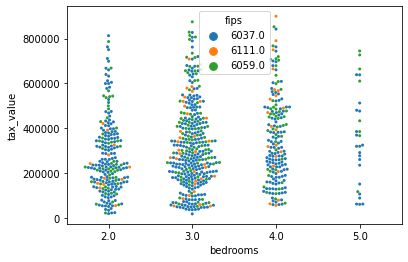

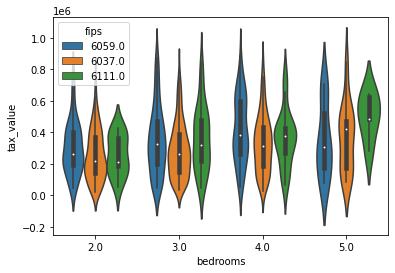

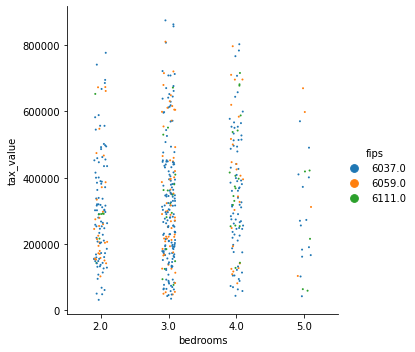

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


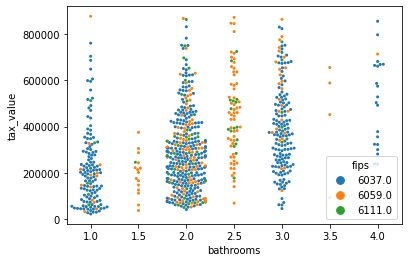

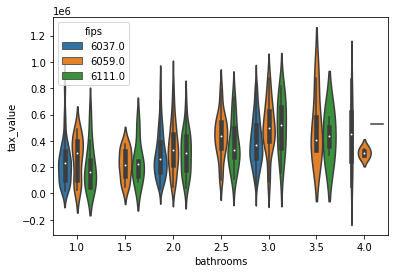

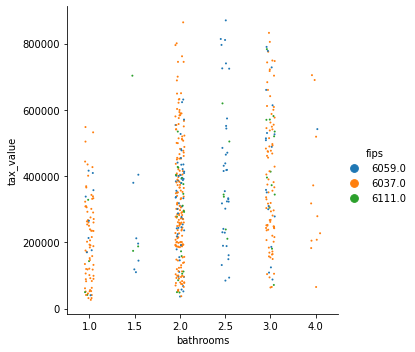

In [7]:
# Time to test out those new defs
ex.plot_categorical_and_continuous_vars(train_df)

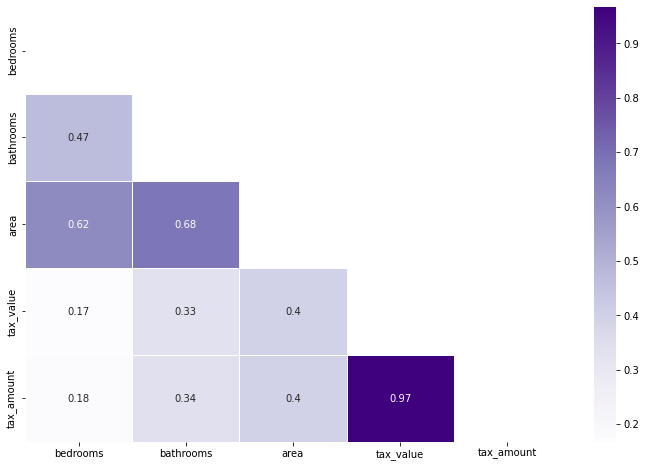

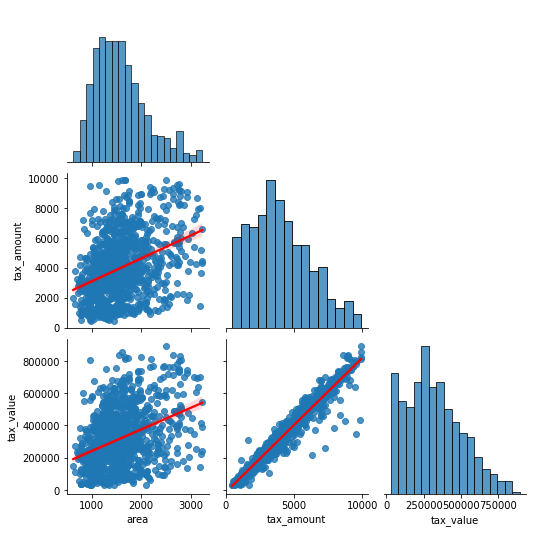

In [8]:
ex.plot_variable_pairs(train_df)

bedrooms
3.0    613221
4.0    343090
2.0    324974
5.0     61485
Name: bedrooms, dtype: int64
3.0    45.668357
4.0    25.550913
2.0    24.201762
5.0     4.578967
Name: bedrooms, dtype: float64


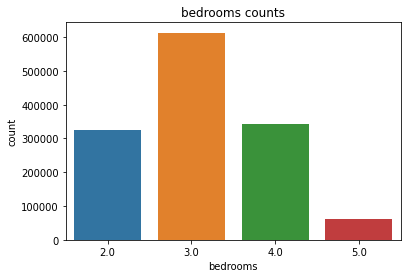

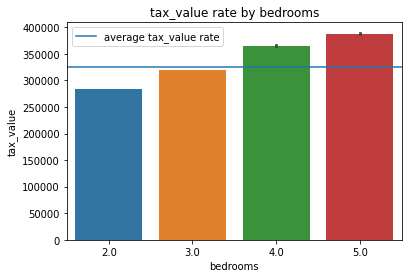

P is less than Alpha.
---------------------------------------------
bathrooms
2.00    651864
3.00    294507
1.00    230912
2.50    107880
4.00     26148
1.50     24208
3.50      7250
1.75         1
Name: bathrooms, dtype: int64
2.00    48.546214
3.00    21.932796
1.00    17.196690
2.50     8.034138
4.00     1.947318
1.50     1.802840
3.50     0.539929
1.75     0.000074
Name: bathrooms, dtype: float64


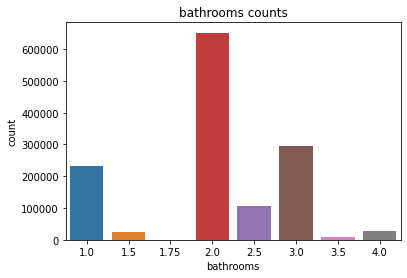

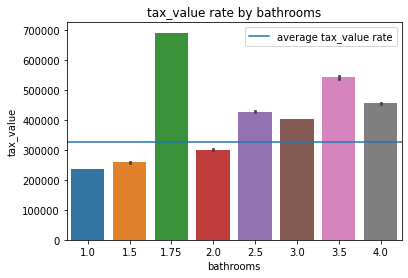

P is less than Alpha.
---------------------------------------------
year_built
1955.0    46196
1950.0    38654
1954.0    37814
1953.0    34368
1956.0    33326
          ...  
1879.0        1
1865.0        1
1870.0        1
1854.0        1
1853.0        1
Name: year_built, Length: 160, dtype: int64
1955.0    3.440351
1950.0    2.878676
1954.0    2.816119
1953.0    2.559485
1956.0    2.481884
            ...   
1879.0    0.000074
1865.0    0.000074
1870.0    0.000074
1854.0    0.000074
1853.0    0.000074
Name: year_built, Length: 160, dtype: float64


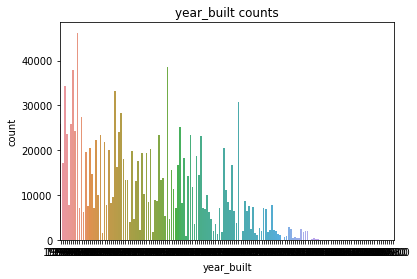

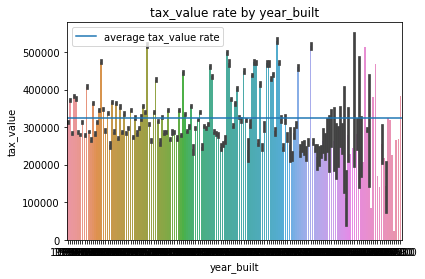

P is less than Alpha.
---------------------------------------------
fips
6037.0    911276
6059.0    328796
6111.0    102698
Name: fips, dtype: int64
6037.0    67.865383
6059.0    24.486398
6111.0     7.648220
Name: fips, dtype: float64


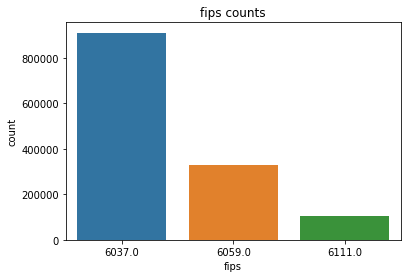

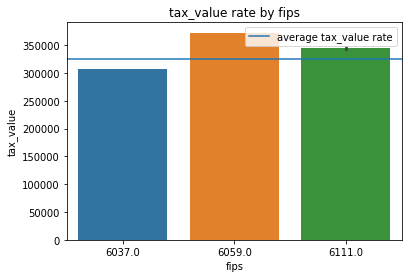

P is less than Alpha.
---------------------------------------------


In [10]:
ex.explore_cat(train_df)

<AxesSubplot:xlabel='area', ylabel='tax_value'>

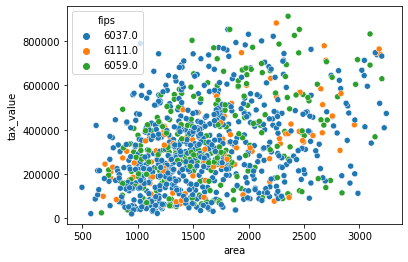

In [14]:
sns.scatterplot(data=train_df.sample(1_000), x='area', y='tax_value', hue="fips")

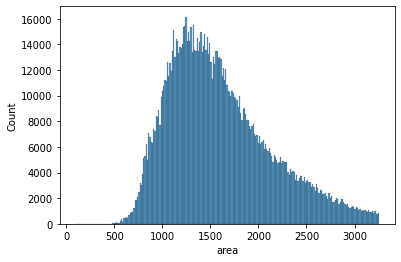

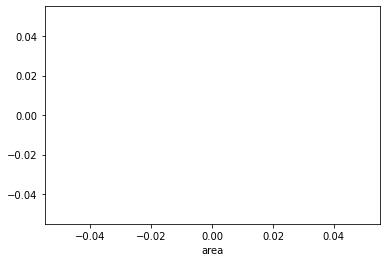

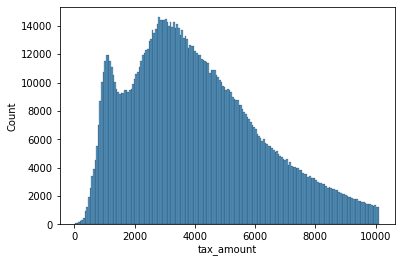

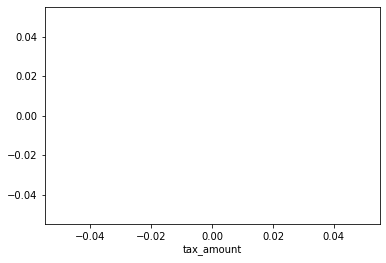

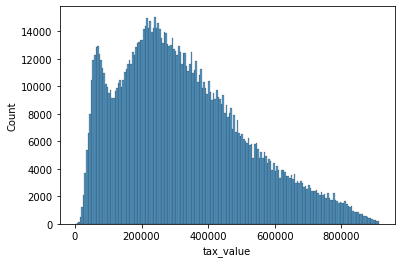

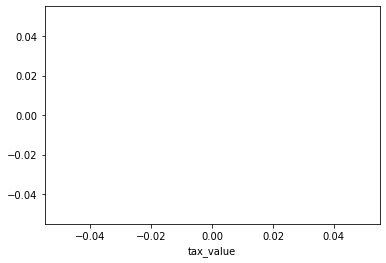

In [11]:
ex.explore_num(train_df)


- Run the appropriate statistical tests where needed.



- What independent variables are correlated with the dependent variable, home value?



- Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?



- Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.



- Explore your dataset with any other visualizations you think will be helpful.